In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]

Text(0, 0.5, 'Page Views')

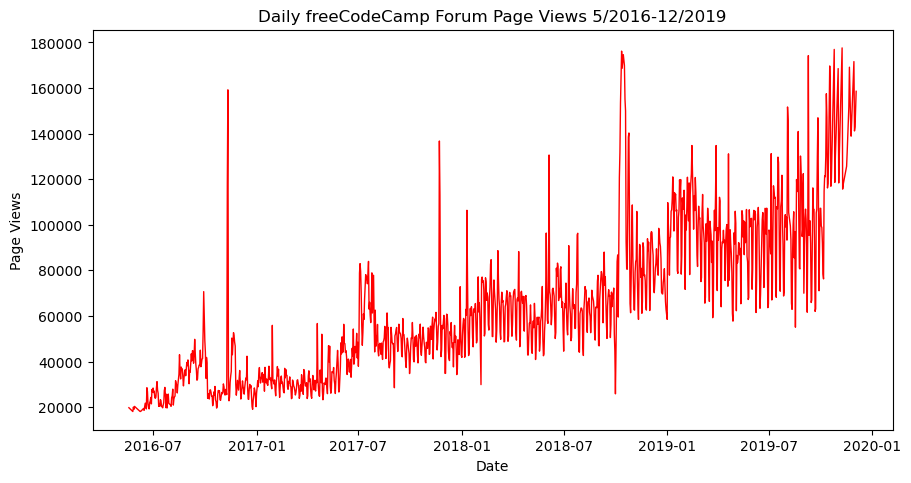

In [5]:
# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
# The label on the x axis should be Date and the label on the y axis should be Page Views.
fig=plt.figure(figsize=(10,5))
axes=fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(df.index, df['value'], 'r', linewidth=1)
axes.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axes.set_xlabel('Date')
axes.set_ylabel('Page Views')


In [6]:

# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
# It should show average daily page views for each month grouped by year.
# The legend should show month labels and have a title of Months.
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
df_bar = df.reset_index(inplace=True)
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df_bar=df.groupby(['year', 'month']).mean()
df_bar.reset_index(inplace=True)
months=['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar=df_bar.pivot(index='year', columns='month', values='value')
df_bar.columns=months


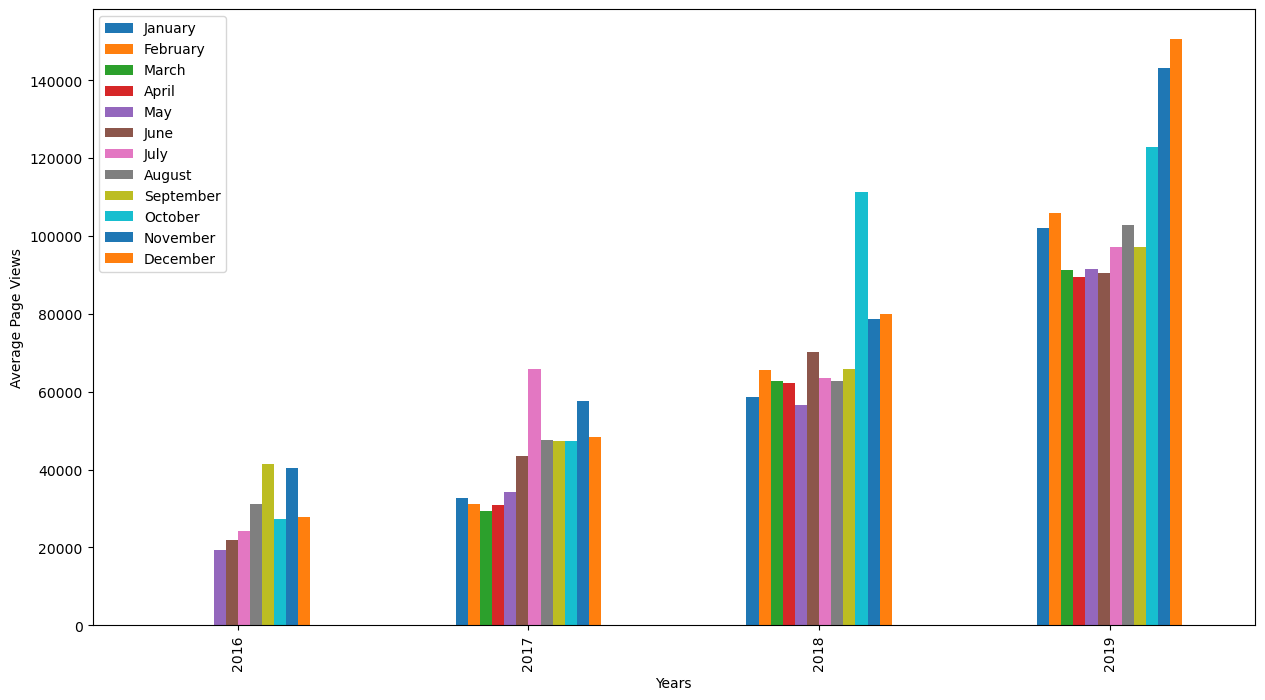

In [7]:

#Draw bar plot
plot=df_bar.plot(kind='bar', figsize=(15,8))
plt.xlabel('Years')
plt.ylabel('Average Page Views')
fig=plot.get_figure()


In [8]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0.5, 1.0, 'Month-wise Box Plot (Trend)')

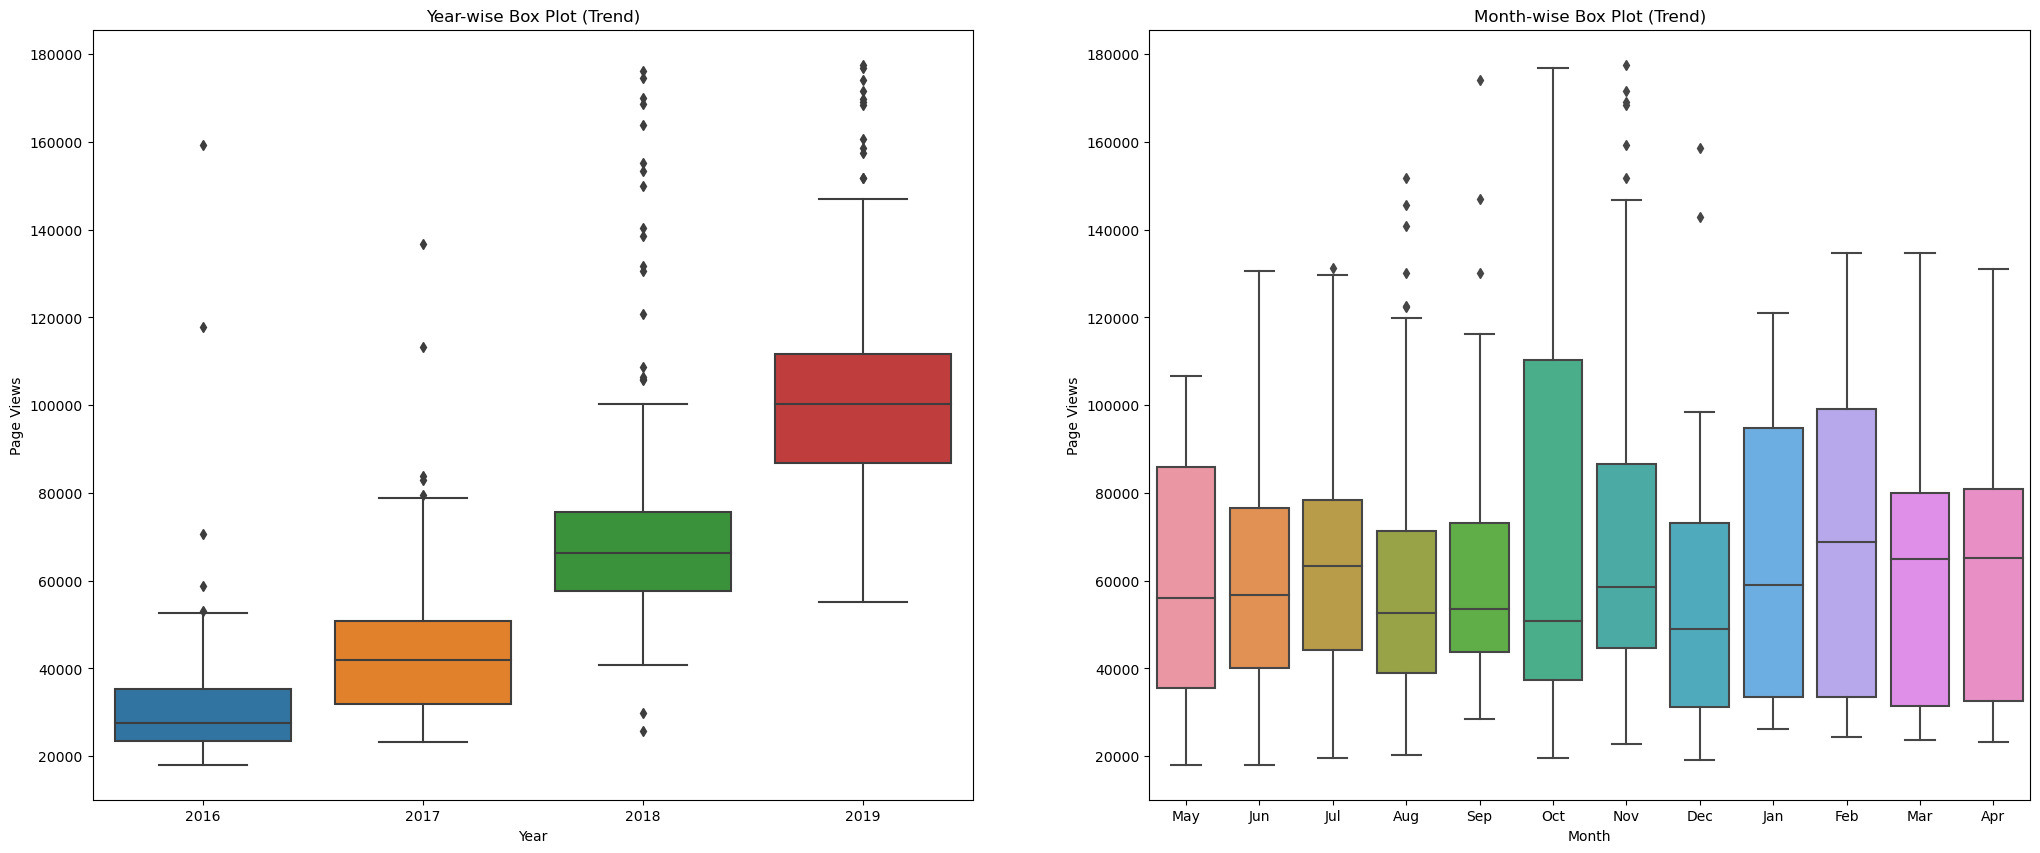

In [9]:
# Draw two adjacent box plots (using Seaborn)
# These box plots should show how the values are distributed within a given year or month and how it compares over time.
# The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).
# Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
chart=plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(x='year', y='value', data=df_box)
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.title('Year-wise Box Plot (Trend)')

plt.subplot(1,2,2)
sns.boxplot(x=df_box['month'], y=df_box['value'])
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.title('Month-wise Box Plot (Trend)')